<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-means-Clustering" data-toc-modified-id="k-means-Clustering-1">k-means Clustering</a></span></li><li><span><a href="#By-The-End-Of-This-Session-You-Should-Be-Able-To:" data-toc-modified-id="By-The-End-Of-This-Session-You-Should-Be-Able-To:-2">By The End Of This Session You Should Be Able To:</a></span></li><li><span><a href="#k-means-Overview" data-toc-modified-id="k-means-Overview-3">k-means Overview</a></span></li><li><span><a href="#k-means-Loss-Function" data-toc-modified-id="k-means-Loss-Function-4">k-means Loss Function</a></span></li><li><span><a href="#k-means-Algorithm-Steps" data-toc-modified-id="k-means-Algorithm-Steps-5">k-means Algorithm Steps</a></span></li><li><span><a href="#k-means-in-scikit-learn" data-toc-modified-id="k-means-in-scikit-learn-6">k-means in scikit-learn</a></span></li><li><span><a href="#Methods-to-choose-number-of-clusters" data-toc-modified-id="Methods-to-choose-number-of-clusters-7">Methods to choose number of clusters</a></span></li><li><span><a href="#Within-Cluster-Sum-of-Squares-(WCSS)" data-toc-modified-id="Within-Cluster-Sum-of-Squares-(WCSS)-8">Within-Cluster Sum of Squares (WCSS)</a></span></li><li><span><a href="#The-Elbow-Method" data-toc-modified-id="The-Elbow-Method-9">The Elbow Method</a></span></li><li><span><a href="#Silhouette-Score" data-toc-modified-id="Silhouette-Score-10">Silhouette Score</a></span></li><li><span><a href="#What-are-the-advantages-of-k-means?" data-toc-modified-id="What-are-the-advantages-of-k-means?-11">What are the advantages of k-means?</a></span></li><li><span><a href="#What-are-the-disadvantage-of-k-means?" data-toc-modified-id="What-are-the-disadvantage-of-k-means?-12">What are the disadvantage of k-means?</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-13">Check for understanding</a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-14">Check for understanding</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-15">Takeaways</a></span></li><li><span><a href="#Sources-of-Inspiration" data-toc-modified-id="Sources-of-Inspiration-16">Sources of Inspiration</a></span></li><li><span><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-17">Bonus Material</a></span></li><li><span><a href="#k-means-Optimization-Function" data-toc-modified-id="k-means-Optimization-Function-18">k-means Optimization Function</a></span></li><li><span><a href="#Centroid-vs-Medoids" data-toc-modified-id="Centroid-vs-Medoids-19">Centroid vs Medoids</a></span></li><li><span><a href="#What-to-Do-When-K-Means-Clustering-Fails" data-toc-modified-id="What-to-Do-When-K-Means-Clustering-Fails-20">What to Do When K-Means Clustering Fails</a></span></li><li><span><a href="#Solutions-to-Initial-Centroids-Problem" data-toc-modified-id="Solutions-to-Initial-Centroids-Problem-21">Solutions to Initial Centroids Problem</a></span></li><li><span><a href="#Post-processing-helps-k-means" data-toc-modified-id="Post-processing-helps-k-means-22">Post-processing helps k-means</a></span></li><li><span><a href="#What-is-the-relationship-between-k-nn-and-k-means?" data-toc-modified-id="What-is-the-relationship-between-k-nn-and-k-means?-23">What is the relationship between k-nn and k-means?</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-24">K-means</a></span></li><li><span><a href="#k-means++" data-toc-modified-id="k-means++-25">k-means++</a></span></li></ul></div>

<center><h2>k-means Clustering</h2></center>
<br>
<center><img src="https://uploads.toptal.io/blog/image/92521/toptal-blog-image-1463639098844-eb9ad14c7f665e556b2cb66a65b6c257.jpg" width="55%"/></center>

By The End Of This Session You Should Be Able To:
----

- List the steps of k-means clustering algorithm
- Describe how to choose the best k in k-means
- List advantages and disadvantages of k-means

k-means Overview
-------

The k-means algorithm involves repeatedly assigning points to clusters and then finding new clusters based on those points.

k-means Loss Function
-------

K-means tries to separate samples in groups of equal variance. It does this by minimizing a criterion known as the inertia or within-cluster sum-of-squares 

$$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

k-means Algorithm Steps
-------
1. Start:
    1. Choose a number of clusters k
    1. Randomly assign each point to a cluster
1. Repeat:
    1. Update: For each of k clusters, compute cluster *centroid* by taking
mean vector of points in the cluster
    1. Assign: Assign each data point to cluster for which centroid is closest
1. Stop when clusters stop changing or run out of computational budget

<center><img src="../images/kmeans_step.png" width="60%"/></center>

k-means in scikit-learn
----

In [2]:
reset -fs

In [3]:
import numpy as np

In [4]:
# Load data
X = np.load("../data/bivariate_unlabeled_data.npy")
# The data is unlabeled bivariate float data
X

array([[-2.76250926, -2.76172401],
       [-2.16912174, -2.24039764],
       [-2.55025615, -3.15886029],
       ...,
       [-1.37885223, -1.03674544],
       [-2.13757758, -0.13285992],
       [-0.49470988,  0.07855605]])

In [5]:
import matplotlib.pyplot as plt
palette = "Dark2"
%matplotlib inline

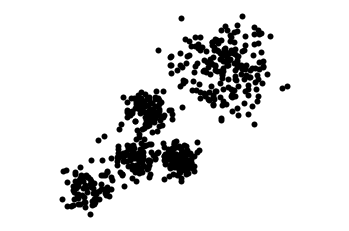

In [6]:
plt.scatter(X[:,0], X[:,1], linewidths=0, color='k')
plt.axis('off');plt.axis('equal');

__Student Discussion__

How will k-means cluster this data?

__Student Poll__

What will be the optimal number of clusters according to k-means?

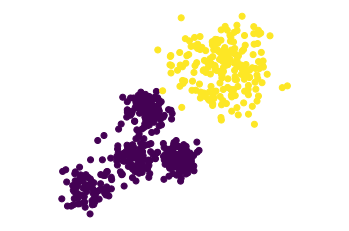

In [12]:
# Let's fit k-means
from sklearn.cluster       import KMeans 
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler

# Fit k-means in scikit-learn
k_means = Pipeline([('standard', StandardScaler()),
                    ('cluster',  KMeans(n_clusters=2)), # Try 1-6; 6 will show variance
                   ])
y = k_means.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y)
plt.axis('off');plt.axis('equal');

Methods to choose number of clusters
-----

- Within-cluster sum of squares (WCSS)
- The Elbow Method 
- Silhouette Score
- [Others in scikit-learn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)

Within-Cluster Sum of Squares (WCSS)
-----

Measures the goodness of a clustering

$$W(C) = \frac{1}{K} \sum_{k=1}^{K} \left( \sum_{x_i, x_j \in C_k} || x_i - x_j ||^2 \right)$$

where $K$ is the number of clusters, $C_k$ is the set of all points with label $k$, and $x_i$ is the position of point $i$. 

__The problem with wcss__

WCSS will always go down does as the number of clusters go up.

The Elbow Method
------

Plot the within-cluster sum of squares and try to see what looks like an "elbow".

In [8]:
sse = {}
for k in range(1, 10):
    k_means = Pipeline([('standard', StandardScaler()),
                        ('cluster',  KMeans(n_clusters=k, max_iter=1_000)), 
                       ])
    kmeans = k_means.fit(X)
    sse[k] = k_means['cluster'].inertia_ # Inertia: Sum of distances of samples to their closest cluster center

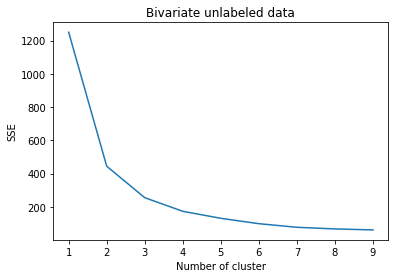

In [9]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('Bivariate unlabeled data');
plt.ylabel("SSE"); 
plt.xlabel("Number of cluster"); 

Source: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

Silhouette Score
-----

A higher Silhouette Score score is proportional to a model with better-defined clusters.

$$\text{silhouette}(x_i) = \frac{b_i - a_i}{max(a_i, b_i)} $$

For each point $x_i$:

* $a_i$ is the mean distance between $x_i$ and all other points in the same cluster
* $b_i$ is the mean distance between $x_i$ and all points in the *nearest* cluster

In [10]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10): 
    k_means = Pipeline([('standard', StandardScaler()),
                        ('cluster',  KMeans(n_clusters=n_clusters, max_iter=1_000)), 
                       ])
    labels = k_means.fit_predict(X)
    score = silhouette_score(X, labels, metric='euclidean')
    print(f"For # clusters = {n_clusters}, the Silhouette Coefficient is {score:.4f}") 

For # clusters = 2, the Silhouette Coefficient is 0.5782
For # clusters = 3, the Silhouette Coefficient is 0.5379
For # clusters = 4, the Silhouette Coefficient is 0.5403
For # clusters = 5, the Silhouette Coefficient is 0.5674
For # clusters = 6, the Silhouette Coefficient is 0.5172
For # clusters = 7, the Silhouette Coefficient is 0.5256
For # clusters = 8, the Silhouette Coefficient is 0.5291
For # clusters = 9, the Silhouette Coefficient is 0.5315


What is the best the Silhouette Coefficient?

It is 2. 

What are the advantages of k-means?
-----

- Empirically useful
- Most common type of clustering
- Simple, Simple, Simple

What are the disadvantage of k-means?
-----

- Finding a useful number of clusters (k) can be ambiguous
- Computational intensive to fit because each training step requires a complete base through the data
- Each data only belongs to single cluster
- Converges to local minima
- Sensitive to outliers
- Applicable only when mean is defined 
- Unable to handle noisy data and outliers
- Can not model complex relationships 
    - Assumes the data is spheroid shape 
    - Spheroid means if you draw a straight line from one point in the cluster to another, it never crosses outside the cluster
- [Read more here](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means/133841)

Check for understanding
-----

Why should you standardize your data before fitting k-means?

Yes.

If you do __not__ standardise your data then the variables measured in large valued units will dominate the computed dissimilarity and variables that are measured in small valued units will contribute very little.

Check for understanding
-----

K-means is an iterative algorithm. It alternates between what two steps?

1. Assign datapoints to nearest cluster
2. Move centroid to the mean of labeled data

<center><h2>Takeaways</h2></center>


- k-means is the most common type of clustering
- k-means training:
    1. Updates the centroid of existing clusters
    2. Re-assigns datapoints to nearest centriod
- Be aware of limitations (e.g., distance metric and scaling)

<center><h2>Sources of Inspiration</h2></center>

- https://realpython.com/k-means-clustering-python/

Bonus Material
-----

k-means Optimization Function
------

<center><img src="../images/optimitization_function.png" width="100%"/></center>



[Source](https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Info-graphs/Day%2043.jpg)

Centroid vs Medoids
-----

Typically, k-means returns a __centroid__ (i.e., the arithmetic mean position of all the points)

In many business settings, you should return the single best _actual_ observed datapoint as a cluster center, aka __medoids__

Implementation - [sklearn_extra.cluster.KMedoids](https://scikit-learn-extra.readthedocs.io/en/latest/generated/sklearn_extra.cluster.KMedoids.html)

<center><h2>What to Do When K-Means Clustering Fails</h2></center>

[A Simple yet Principled Alternative Algorithm](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0162259)

Solutions to Initial Centroids Problem
-----

- k-means++
- multiple runs
- grid search
- Select more than k initial centroids and then select among these initial centroids
- Look at the data and manually seed
- Use Bisecting K-means

Post-processing helps k-means
-----

- Eliminate small clusters that may represent outliers
- Split ‘loose’ clusters, i.e., clusters with relatively high SSE
- Merge clusters that are ‘close’ and that have relatively low SSE

What is the relationship between k-nn and k-means?
-----

Nothing important.

They both use k as a parameter

K-means
----

Mathematically, k-means partitions the observations according to the Voronoi diagram generated by the means.


[A nice implementation of k-means](https://github.com/rhettinger/modernpython/blob/master/kmeans.py)

k-means++
-----

Like many algoritms, k-means is easy to get caught in a local minimum.

How would we choose a better starting points?

One alternative to this is to choose centroids based on random points, which will make it likely initial centroids will be farther apart.

k-means++ is an extension of this idea, the same algorithm as k-means but with a different starting point.

 * Choose one point for first center.
 * Repeat:
    
    * Calculate distance from each point to the nearest center $d_i$
    * Choose a point to be the next center, randomly, using a weighed probability $d_i^2$

 ... until k centers have been choosen.
 
 sklearn's KMeans default is `init='k-means++'` 
 
 [Source](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)